Import stuff and initialize global parameters.

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Conv2D, Flatten, Dense, LSTM, \
    MaxPooling2D
from keras.models import Sequential
from common import extract_training_data_as_stacked, generate_multifile_conc, random_file_gen
from sklearn.metrics import explained_variance_score

IMAGE_SIZE = (64, 64, 3)

Using TensorFlow backend.


In [2]:
images, labels = extract_training_data_as_stacked("Data/20171211-185037299.h264", 
                                                  "Data/20171211-185037299.csv", 
                                                  IMAGE_SIZE)

In [3]:
video_names = ["20180110-134224447_clean.h264",
               "20180110-123728742_clean.h264",
               "20180109-181030651_clean.h264",
               "20180110-153443702_clean.h264",
               "20180110-155554501_clean.h264",
               "20180110-161513446_clean.h264",
               "20180110-164811649_clean.h264"
               ]

csv_names = ["20180110-134224447_clean.csv",
             "20180110-123728742_clean.csv",
             "20180109-181030651_clean.csv",
             "20180110-153443702_clean.csv",
             "20180110-155554501_clean.csv",
             "20180110-161513446_clean.csv",
             "20180110-164811649_clean.csv"
             ]

For converting from comma decimals to point decimals and removing FrameNo column.
Usually not needed unless you're dealing with fresh data.

label_file = "20180110-164811649.csv"
labels = pd.read_csv("./Data/" + label_file, sep="\t", decimal=",")
labels = labels.drop("FrameNo", 1)
labels.to_csv("./Data/Preprocessed/" + label_file.split(".")[0] + "_clean.csv", sep="\t", index=False)

In [4]:
data_gen = generate_multifile_conc(video_names, csv_names, batch_size=500, nr_batches=104)

# Convolutional network
Reading data as bundles and creating initial model.

In [5]:
def create_thicc_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu', input_shape=(64, 64, 12)))
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(Flatten())
    model.add(Dense(4, activation='linear'))

    model.compile(loss="mse", optimizer="adam")    
    return model


thicc_model = create_thicc_model()
thicc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        3488      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [6]:
def create_slim_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu', input_shape=(64, 64, 12)))
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(4, activation='linear'))

    model.compile(loss="mse", optimizer="adam")    
    return model


slim_model = create_slim_model()
slim_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        3488      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 25092     
Total para

In [7]:
history = thicc_model.fit_generator(data_gen, steps_per_epoch=104, epochs=10)

Epoch 1/10
104/104 [==============================] - 368s - loss: 0.1011   
Epoch 2/10
104/104 [==============================] - 371s - loss: 0.0135   
Epoch 3/10
104/104 [==============================] - 367s - loss: 0.0034   
Epoch 4/10
104/104 [==============================] - 366s - loss: 0.0022   
Epoch 5/10
104/104 [==============================] - 366s - loss: 0.0011   
Epoch 6/10
104/104 [==============================] - 366s - loss: 5.7359e-04   
Epoch 7/10
104/104 [==============================] - 366s - loss: 4.8125e-04   
Epoch 8/10
104/104 [==============================] - 366s - loss: 1.9722e-04   
Epoch 9/10
104/104 [==============================] - 366s - loss: 3.7526e-04   
Epoch 10/10
104/104 [==============================] - 366s - loss: 1.3732e-04   


In [8]:
history = slim_model.fit_generator(data_gen, steps_per_epoch=104, epochs=10)

Epoch 1/10
104/104 [==============================] - 370s - loss: 0.1364   
Epoch 2/10
104/104 [==============================] - 369s - loss: 0.0184   
Epoch 3/10
104/104 [==============================] - 369s - loss: 0.0045   
Epoch 4/10
104/104 [==============================] - 369s - loss: 0.0022   
Epoch 5/10
104/104 [==============================] - 369s - loss: 0.0014   
Epoch 6/10
104/104 [==============================] - 369s - loss: 9.6153e-04   
Epoch 7/10
104/104 [==============================] - 369s - loss: 7.4214e-04   
Epoch 8/10
104/104 [==============================] - 369s - loss: 5.1682e-04   
Epoch 9/10
104/104 [==============================] - 369s - loss: 4.4032e-04   
Epoch 10/10
104/104 [==============================] - 369s - loss: 3.3355e-04   


## Saving models
Saves the model into a file and loads it again.

In [9]:
from keras.models import load_model

thicc_model.save('conv_thicc.h5')
slim_model.save('conv_slim.h5')

del thicc_model
del slim_model
model = load_model('conv_thicc.h5')

## Prediction analysis

In [10]:
test_images, test_labels = extract_training_data_as_stacked("Data/Preprocessed/20180110-161513446_clean.h264", 
                                                            "Data/Preprocessed/20180110-161513446_clean.csv", 
                                                            IMAGE_SIZE)

prediction = model.predict(test_images)

E:\Kooliasjad\Magister\Neural Networks\RCSnailAI\common.py:54: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  training_labels = labels.loc[training_label_ids]


### Convolutional network results
Testing prediction printout and graphs.

In [11]:
prediction

array([[-0.32508993, -0.09146387,  0.91377246,  2.20664024],
       [-0.12896436, -0.06662745,  0.74688774,  2.10034156],
       [-0.35396832, -0.04797847,  1.03641033,  1.90751004],
       ..., 
       [ 0.35009801, -0.09171147,  0.78627104,  1.53157985],
       [ 0.41528314, -0.0628568 ,  0.67709851,  1.78129292],
       [-0.09259599, -0.0104906 ,  0.85579491,  1.8879081 ]], dtype=float32)

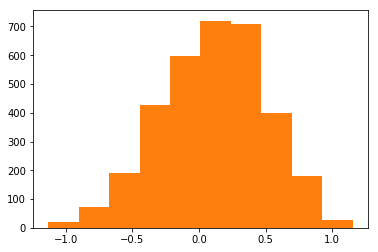

ValueError: max must be larger than min in range parameter.

In [13]:
# Prediction histogram
plt.hist(prediction[:, 0])
plt.show()

# Test data
plt.hist(test_labels['Steering'])
plt.show()

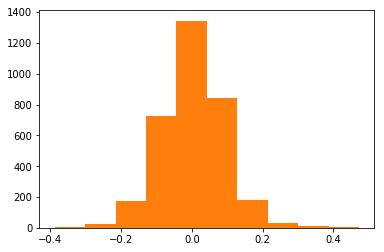

ValueError: max must be larger than min in range parameter.

In [14]:
# Prediction histogram
plt.hist(prediction[:, 1])
plt.show()

# Test data
plt.hist(test_labels['Braking'])
plt.show()

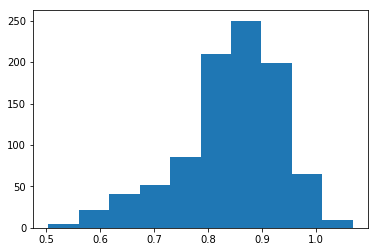

In [117]:
# Prediction histogram
plt.hist(prediction[:, 2])
plt.show()

# Test data
plt.hist(test_labels['Throttle'])
plt.show()

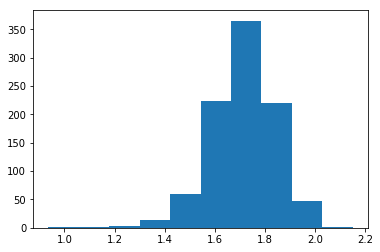

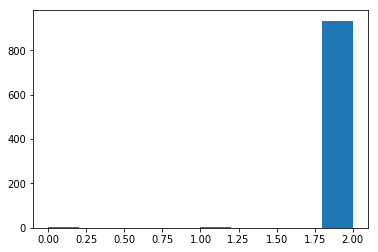

In [118]:
# Prediction histogram
plt.hist(prediction[:, 3])
plt.show()

# Test data
plt.hist(test_labels['Gear'])
plt.show()

### Result analysis
Explained variance etc.

Firstly clip incorrect values back into known bounds. Afterwards find the explained variance.

In [119]:
validation_labels = test_labels.as_matrix(columns=test_labels.columns[1: ])

clipped_prediction = np.zeros_like(prediction)

# Steering
clipped_prediction[:, 0] = np.clip(prediction[:, 0], -1, 1)
# Brakes
clipped_prediction[:, 1] = np.clip(prediction[:, 1], 0, 1)
# Throttle
clipped_prediction[:, 2] = np.clip(prediction[:, 2], 0, 1)
# Gear
clipped_prediction[:, 3] = np.round(prediction[:, 3])


print(validation_labels.shape)
print(clipped_prediction.shape)

(939, 4)
(939, 4)


In [120]:
explained_variance_score(validation_labels, clipped_prediction)

0.088881589872853925

## K fold cross validation

In [ ]:
from common import run_kfold_cross_val

# Concatenate both videos
total_images = np.concatenate((images, test_images), axis=0)
total_labels = np.concatenate((labels, test_labels), axis=0)

total_y_train = total_labels[:, 1:-1]

results = run_kfold_cross_val(create_model, total_images, total_y_train)
print(results)
print(results.mean())
print(np.median(results))